In [1]:
from sklearn.datasets import load_wine
import pandas as pd

from mlxtend.frequent_patterns import apriori

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df = df.sample(frac=1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0,1
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [3]:
for col in data.feature_names:
    df[col] = df[col] > df[col].median()

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
21,False,True,True,False,True,True,True,False,True,False,True,True,True,0
87,False,False,True,True,False,False,False,True,False,False,True,True,False,1
150,True,True,True,True,True,False,False,False,False,True,False,False,False,2
140,False,True,True,True,False,False,False,True,False,False,False,False,False,2
2,True,True,True,False,True,True,True,False,True,True,True,True,True,0


In [4]:
target = df['target']
df = df.drop('target', axis=1)

In [5]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

In [6]:
frequent_itemsets

,support,itemsets
0,0.477528,(alcohol)
1,0.500000,(malic_acid)
2,0.483146,(ash)
3,0.466292,(alcalinity_of_ash)
4,0.460674,(magnesium)
5,0.500000,(total_phenols)
6,0.500000,(flavanoids)
7,0.466292,(nonflavanoid_phenols)
8,0.500000,(proanthocyanins)
9,0.500000,(color_intensity)


In [7]:
from itertools import chain, combinations

# Function to get all subsets of a set


def get_subsets(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))


# Generate the new list
new_list = set()
for item in frequent_itemsets['itemsets']:
    if len(item) == 1:
        new_list.add(item)
    else:
        subsets = map(frozenset, get_subsets(item))
        new_list.update(subsets)

new_list = list(new_list)
new_list = [list(item) for item in new_list]
new_list

[['flavanoids', 'od280/od315_of_diluted_wines'],
 ['proline'],
 ['od280/od315_of_diluted_wines'],
 ['nonflavanoid_phenols'],
 ['malic_acid'],
 ['total_phenols', 'flavanoids'],
 ['alcohol'],
 ['total_phenols'],
 ['flavanoids'],
 ['ash'],
 ['alcalinity_of_ash'],
 ['proanthocyanins'],
 ['magnesium'],
 ['hue'],
 ['color_intensity']]

In [8]:
univar_list, multivar_list = [], []
for item in new_list:
    if len(item) == 1:
        univar_list.append(item[0])
    else:
        multivar_list.append(item)

univar_list, multivar_list

(['proline',
  'od280/od315_of_diluted_wines',
  'nonflavanoid_phenols',
  'malic_acid',
  'alcohol',
  'total_phenols',
  'flavanoids',
  'ash',
  'alcalinity_of_ash',
  'proanthocyanins',
  'magnesium',
  'hue',
  'color_intensity'],
 [['flavanoids', 'od280/od315_of_diluted_wines'],
  ['total_phenols', 'flavanoids']])

In [9]:
df = df[univar_list]

In [10]:
for item in multivar_list:
    # set it true if all the items in the itemset are true
    df[str(item)] = df[item].all(axis=1)

df.head()

,proline,od280/od315_of_diluted_wines,nonflavanoid_phenols,malic_acid,alcohol,total_phenols,flavanoids,ash,alcalinity_of_ash,proanthocyanins,magnesium,hue,color_intensity,"['flavanoids', 'od280/od315_of_diluted_wines']","['total_phenols', 'flavanoids']"
21,True,True,False,True,False,True,True,True,False,True,True,True,False,True,True
87,False,True,True,False,False,False,False,True,True,False,False,True,False,False,False
150,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False
140,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
2,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True


In [11]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Building the model with 3 clusters 
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(df) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 85, cost: 580.0
Run 1, iteration: 2/100, moves: 16, cost: 562.0
Run 1, iteration: 3/100, moves: 13, cost: 552.0
Run 1, iteration: 4/100, moves: 9, cost: 552.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 603.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 44, cost: 556.0
Run 3, iteration: 2/100, moves: 13, cost: 559.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14, cost: 557.0
Run 4, iteration: 2/100, moves: 0, cost: 557.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 34, cost: 555.0
Run 5, iteration: 2/100, moves: 3, cost: 555.0
Best run was number 1


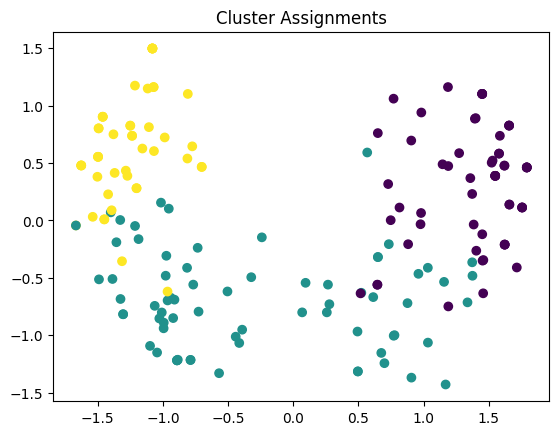

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (adjust n_components as needed)
pca = PCA(n_components=2)
trans_data_pca = pca.fit_transform(df)
# Plot clusters in 2D
plt.scatter(trans_data_pca[:, 0],
            trans_data_pca[:, 1], c=target, cmap='viridis')
plt.title('Cluster Assignments')
plt.show()

In [13]:
(clusters == target.values).sum() / len(target.values)

0.10674157303370786

In [ ]:
df.values

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming trans_data_features is your DataFrame
# pca = PCA(n_components=2)
# trans_data_features_pca = pca.fit_transform(trans_data_features)

distance_matrix = pairwise_distances(df.values, metric='jaccard')

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Visualize the clusters in 2D
# plt.scatter(trans_data_features_pca[:, 0], trans_data_features_pca[:, 1], c=dbscan_labels, cmap='viridis')
# plt.title('DBSCAN Clustering Results')
# plt.show()
dbscan_labels, target.values

(array([ 0, -1,  1,  1,  0,  0,  1,  0, -1,  0, -1,  0,  0,  0, -1,  1, -1,
        -1, -1, -1,  1,  0,  1, -1, -1,  1,  1, -1,  1, -1,  1,  0, -1, -1,
        -1,  0,  0, -1,  0, -1,  0, -1, -1,  0,  1,  1,  0, -1, -1,  0, -1,
         0, -1,  0,  1,  1, -1, -1, -1, -1, -1,  1, -1,  0, -1,  0,  1,  0,
        -1, -1,  0,  0,  0,  0, -1,  1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
        -1, -1, -1,  0, -1,  0,  0, -1,  0,  1,  0,  1,  0, -1,  0,  0,  1,
         1,  1,  0, -1,  1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  1, -1,  1,
         1,  0,  1,  0, -1,  1, -1,  1,  0,  1, -1, -1, -1, -1,  0,  0,  0,
         0,  0,  1,  0,  1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,
        -1, -1, -1,  1, -1,  1, -1,  0, -1, -1,  1, -1, -1,  0, -1, -1,  0,
         1, -1, -1,  0, -1,  1, -1,  0]),
 array([0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0,
        1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0,
        2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 

In [15]:
from sklearn.cluster import AgglomerativeClustering
aggloCluster = AgglomerativeClustering(n_clusters=3)
labels = aggloCluster.fit_predict(df.values)
labels, target.values

(array([0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0,
        1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0,
        2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0,
        2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1,
        0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2,
        1, 0]),
 array([0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0,
        1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0,
        2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0,
        2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0,
        0, 1, 1, 0, 0,

In [16]:
cluster = []
print(len(labels))
for i in labels:
    if i == 1:
        cluster.append(2)
    if i == 2:
        cluster.append(1)
    if i == 0:
        cluster.append(0)
cluster_freq = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(len(labels)):
    if labels[i] == 0:
        cluster_freq[0][target[i]] += 1
    if labels[i] == 1:
        cluster_freq[1][target[i]] += 1
    if labels[i] == 2:
        cluster_freq[2][target[i]] += 1

print(cluster_freq)

178
[[28, 36, 19], [20, 19, 21], [11, 16, 8]]


In [17]:
(cluster == target.values).sum() / len(target.values)

0.4044943820224719

In [18]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score

print(f"V measure Score: {v_measure_score(cluster, target.values)}")
print(f"Homogeneity Score: {homogeneity_score(cluster, target.values)}")
print(f"Completeness Score: {completeness_score(cluster, target.values)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(cluster, target.values)}")
print(f"Adjusted Mutual Info Score: {
      adjusted_mutual_info_score(cluster, target.values)}")

V measure Score: 0.5087044822043733
Homogeneity Score: 0.5194259055988077
Completeness Score: 0.49841670777246766
Adjusted Rand Score: 0.4366908656052231
Adjusted Mutual Info Score: 0.5033628521029984


In [19]:
df = pd.read_csv("./data/heart/heart.csv")

target_df = df['output']
df = df.drop('output', axis=1)
df = df.sample(frac=1)
for col in df.columns:
    df[col] = df[col] > df[col].median()

In [20]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.498350,(age)
1,0.435644,(trtbps)
2,0.498350,(chol)
3,0.491749,(thalachh)
4,0.462046,(oldpeak)
5,0.468647,(slp)
6,0.422442,(caa)


In [21]:
from itertools import chain, combinations

# Function to get all subsets of a set


def get_subsets(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))


# Generate the new list
new_list = set()
for item in frequent_itemsets['itemsets']:
    if len(item) == 1:
        new_list.add(item)
    else:
        subsets = map(frozenset, get_subsets(item))
        new_list.update(subsets)

new_list = list(new_list)
new_list = [list(item) for item in new_list]
new_list

[['trtbps'], ['chol'], ['thalachh'], ['slp'], ['oldpeak'], ['caa'], ['age']]

In [22]:
univar_list, multivar_list = [], []
for item in new_list:
    if len(item) == 1:
        univar_list.append(item[0])
    else:
        multivar_list.append(item)

univar_list, multivar_list

(['trtbps', 'chol', 'thalachh', 'slp', 'oldpeak', 'caa', 'age'], [])

In [23]:
df = df[univar_list]

In [24]:
for item in multivar_list:
    # set it true if all the items in the itemset are true
    df[str(item)] = df[item].all(axis=1)

df

,trtbps,chol,thalachh,slp,oldpeak,caa,age
263,False,True,True,False,True,True,True
89,False,True,False,False,True,False,True
220,True,True,True,False,True,True,True
176,False,False,True,True,True,True,True
256,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...
170,False,True,False,False,False,True,True
32,False,False,True,True,False,False,False
107,True,False,False,False,False,False,False
265,False,False,False,True,False,True,True


In [25]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Building the model with 3 clusters 
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(df) 
# clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 61, cost: 605.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 49, cost: 572.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 97, cost: 644.0
Run 3, iteration: 2/100, moves: 40, cost: 605.0
Run 3, iteration: 3/100, moves: 1, cost: 605.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 83, cost: 626.0
Run 4, iteration: 2/100, moves: 18, cost: 626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 40, cost: 713.0
Best run was number 2


In [26]:
clusters, target_df.values

(array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 

In [27]:
len(clusters), len(target_df.values)

(303, 303)

In [28]:
len(clusters), len(target_df.values)

(303, 303)

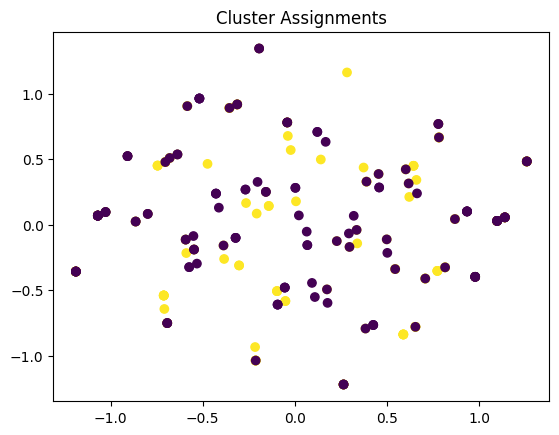

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (adjust n_components as needed)
pca = PCA(n_components=2)
trans_data_pca = pca.fit_transform(df)
# Plot clusters in 2D
plt.scatter(trans_data_pca[:, 0], trans_data_pca[:,
            1], c=target_df, cmap='viridis')
plt.title('Cluster Assignments')
plt.show()

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming trans_data_features is your DataFrame
# pca = PCA(n_components=2)
# trans_data_features_pca = pca.fit_transform(trans_data_features)

distance_matrix = pairwise_distances(df.values, metric='jaccard')

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Visualize the clusters in 2D
# plt.scatter(trans_data_features_pca[:, 0], trans_data_features_pca[:, 1], c=dbscan_labels, cmap='viridis')
# plt.title('DBSCAN Clustering Results')
# plt.show()
dbscan_labels, target_df.values

(array([ 0, -1,  0,  0,  0,  1,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  2,
         0, -1,  3,  0,  1,  4,  0, -1, -1,  5,  6, -1,  7,  0,  0,  3,  0,
         0,  0,  0,  7,  0, -1,  0,  8,  0,  7,  0, -1, -1,  3,  0,  2,  0,
        -1, -1,  3,  7,  0,  7,  0,  0, -1,  0, -1,  9, -1,  0,  9,  0, -1,
         0, -1,  0, -1,  0, -1,  8,  0,  0,  9,  0,  5,  0, -1,  3, -1,  0,
        -1, -1, -1,  0,  0,  6,  0, -1,  0,  0, -1,  0,  7,  0,  0,  0, -1,
        -1,  0,  7,  0,  0,  0,  2, -1,  8, -1,  8, -1,  0,  0,  0,  7,  2,
         0,  2, -1, -1,  0,  9,  7, -1,  0,  7,  0, -1,  3,  0, -1,  0,  0,
        -1,  8,  4,  0,  4,  1,  0,  0,  0, -1,  0,  3,  0, -1,  0,  9,  7,
        -1, -1,  0, -1,  3,  0,  7,  0,  1,  0,  0, -1,  0,  0,  1,  7,  0,
         3,  4,  0,  0, -1,  3, -1, -1, -1,  3, -1, -1,  5,  0,  7, -1, -1,
         0,  0,  0, -1,  0,  6,  6, -1,  7, -1,  0,  8,  3,  4, -1,  0,  9,
        -1, -1,  0,  0,  6,  0, -1,  0, -1, -1, -1, -1,  0,  8,  0, -1,  0,
         0, 

In [31]:
from sklearn.cluster import AgglomerativeClustering
aggloCluster = AgglomerativeClustering(n_clusters=2)
labels = aggloCluster.fit_predict(df.values)
labels, target_df.values

(array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [33]:
# cluster = []
# print(len(labels))
# for i in labels:
#     if i == 1:
#         cluster.append(2)
#     if i == 2:
#         cluster.append(1)
#     if i == 0:
#         cluster.append(0)
# cluster_freq = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
# for i in range(len(labels)):
#     if labels[i] == 0:
#         cluster_freq[0][target[i]] += 1
#     if labels[i] == 1:
#         cluster_freq[1][target[i]] += 1
#     if labels[i] == 2:
#         cluster_freq[2][target[i]] += 1

# print(cluster_freq)

In [34]:
(cluster == target_df.values).sum() / len(target.values)

0.4943820224719101

In [35]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score

print(f"V measure Score: {v_measure_score(cluster, target_df.values)}")
print(f"Homogeneity Score: {homogeneity_score(cluster, target_df.values)}")
print(f"Completeness Score: {completeness_score(cluster, target_df.values)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(cluster, target_df.values)}")
print(f"Adjusted Mutual Info Score: {
      adjusted_mutual_info_score(cluster, target_df.values)}")

V measure Score: 0.003518274919111828
Homogeneity Score: 0.003561233573857552
Completeness Score: 0.0034763403196331434
Adjusted Rand Score: -0.0010264747840568408
Adjusted Mutual Info Score: 0.0010847184140646616
